In [1]:
#Name: Becca Dura

import pandas
import numpy
#Read in dataset
data = pandas.read_csv('bikeshare_projectA.csv')

In [2]:
#Look at dataset
data
#Use cnt, weathersit, atempc, month, holiday, weekday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,tempc,atempc,humpercent,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,985
1,2,1/2/2011,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,801
2,3,1/3/2011,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,1349
3,4,1/4/2011,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,1562
4,5,1/5/2011,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,1600
5,6,1/6/2011,1,0,1,0,4,1,1,1.604356,-0.608206,51.8261,6.000868,1606
6,7,1/7/2011,1,0,1,0,5,1,2,1.236534,-2.216626,49.8696,11.304642,1510
7,8,1/8/2011,1,0,1,0,6,0,2,-0.245000,-5.291236,53.5833,17.875868,959
8,9,1/9/2011,1,0,1,0,0,0,1,-1.498349,-8.332450,43.4167,24.250650,822
9,10,1/10/2011,1,0,1,0,1,1,1,-0.910849,-6.041392,48.2917,14.958889,1321


In [3]:
def regression_kNN(new_example,train_data,k):
    #Make a copy of the training set to prevent it from being damaged
    train_data_copy = train_data.copy()
    #Calculates the Euclidean distance
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['atempc']-train_data_copy['atempc'])**2
        +(new_example['holiday']-train_data_copy['holiday'])**2
        +(new_example['weathersit']-train_data_copy['weathersit'])**2
        +(new_example['weekday']-train_data_copy['weekday'])**2
        +(new_example['mnth']-train_data_copy['mnth'])**2)
    #Sorts the data based on Euclidean distance
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #Finds the mean of the cnt of the first k examples to find the average/prediction
    prediction = sorted_data[0:k]['cnt'].mean()
    #Return the prediction
    return prediction

def regression_all_kNN(test_data,train_data,k):
    #Applies the regression_kNN function to each item in the test data with the train data and k passed 
    #as the other two arguments. The result will be a series of the individual results.
    return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

def mean_abs_error(actual,predicted):
    #Finds the difference between the actual and predicted cnt 
    diff = abs(actual-predicted)
    #Calculates the mean absolute error
    mae = sum(diff)/len(actual)
    #Returns the mean absolute error
    return mae

In [4]:
#Shuffles the data, so we can "sample" the full set in random order
shuffled_data = data.sample(frac=1)

#Uses the first 70 rows (approximately 10%) in the shuffled dataset as testing data
test_data = shuffled_data.iloc[0:70]
#Uses the rest of the dataset as training data
train_data = shuffled_data.iloc[70:]

#Applies regression and prints the predictions for the number of bikes rented in the test dataset examples as well as the
#actual number of bikes rented in the test dataset examples
#Plugs the best k value (taken from the graph below) into the algorithm
predictions9NN = regression_all_kNN(test_data,train_data,9)
print(test_data['cnt'])
print(predictions9NN)
mean_abs_error(test_data['cnt'],predictions9NN)

108    3204
638    6889
135    3958
290    4748
447    8362
146    4679
677    5315
504    8294
130    4182
220    4602
367    2236
515    6855
324    2765
433    4569
409    3922
392    4023
485    5572
93     3115
659    6824
534    5099
123    2633
97     1471
705    5375
153    5312
725     441
309    3649
553    4840
584    7273
303    3669
76     3239
       ... 
212    4266
69     1977
522    7055
630    8395
16     1000
32     1526
239    4334
240    4634
444    6093
106    3744
301     627
494    4717
669    5566
139    4917
155    4906
204    3606
253    5046
469    7460
4      1600
419    3487
418    5062
479    5633
356    2209
234    5895
519    7641
282    5117
724    1013
697    5260
283    4563
658    8090
Name: cnt, Length: 70, dtype: int64
108    5126.555556
638    5855.000000
135    4452.888889
290    4449.333333
447    5833.888889
146    5939.888889
677    4934.444444
504    6835.777778
130    5360.777778
220    5544.666667
367    1402.666667
515    5752.777778
324 

1216.15873015873

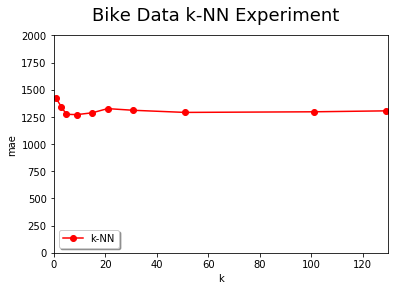

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

#Reload the dataset
data = pandas.read_csv('bikeshare_projectA.csv')

#Reshuffle the data, so it's in a random order
shuffled_data = data.sample(frac=1)

#Take the first 70 rows in the shuffled dataset as testing data
test_data = shuffled_data.iloc[0:70]
#Use the rest of the shuffled dataset as training data
train_data = shuffled_data.iloc[70:]

#Use these k values
k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_mae = []

#Calculates the mean absolute error for each k value listed above and places it into a list
for k in k_vals:
    
    predictions = regression_all_kNN(test_data,train_data,k)
    current_mae = mean_abs_error(test_data['cnt'],predictions)
    kNN_mae.append(current_mae)


#Creates the plot and labels the graph
plt.suptitle('Bike Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('mae')
plt.plot(k_vals,kNN_mae,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,2000])

plt.show()